In [1]:
import pandas as pd
# %pip install scipy
from scipy import stats
url = "https://raw.githubusercontent.com/nkmwicz/data-for-students/refs/heads/main/soccer-players.csv"
df = pd.read_csv(url)
df.head(5)

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,right,194.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32403 entries, 0 to 32402
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   player_id                             32403 non-null  int64  
 1   first_name                            30345 non-null  object 
 2   last_name                             32403 non-null  object 
 3   name                                  32403 non-null  object 
 4   last_season                           32403 non-null  int64  
 5   current_club_id                       32403 non-null  int64  
 6   player_code                           32403 non-null  object 
 7   country_of_birth                      29600 non-null  object 
 8   city_of_birth                         29942 non-null  object 
 9   country_of_citizenship                32023 non-null  object 
 10  date_of_birth                         32356 non-null  object 
 11  sub_position   

In [3]:
df.shape

(32403, 23)

In [4]:
df.describe()

,player_id,last_season,current_club_id,height_in_cm,market_value_in_eur,highest_market_value_in_eur
count,3.240300e+04,32403.000000,32403.000000,30059.000000,3.086900e+04,3.086900e+04
mean,3.445789e+05,2019.337777,4809.252045,182.291161,1.611350e+06,3.675045e+06
std,2.806831e+05,3.965914,11601.982978,6.971224,6.362017e+06,9.653897e+06
min,1.000000e+01,2012.000000,3.000000,17.000000,1.000000e+04,1.000000e+04
25%,1.066980e+05,2016.000000,403.000000,178.000000,1.000000e+05,2.750000e+05
50%,2.824210e+05,2020.000000,1071.000000,183.000000,2.500000e+05,8.000000e+05
75%,5.242085e+05,2023.000000,3060.000000,187.000000,7.000000e+05,2.800000e+06
max,1.309800e+06,2024.000000,110302.000000,207.000000,2.000000e+08,2.000000e+08


In [5]:
df['height_in_cm'].mean()

np.float64(182.29116071725608)

In [6]:
def convert(float:float) -> float:
    return float * 0.0328084

convert(df['height_in_cm'].median())

6.0039372

In [7]:
convert(df['height_in_cm'].mode()[0])

np.float64(5.905512)

In [8]:
convert(df['height_in_cm'].mean())

np.float64(5.980681317276025)

In [9]:
import statistics as stats

stats.mean(df['height_in_cm'].dropna())
stats.median(df['height_in_cm'].dropna())
stats.mode(df['height_in_cm'].dropna())


180.0

In [10]:
df['height_in_cm'].min()
df['height_in_cm'].max()

207.0

In [11]:
from scipy import stats as st

st.skew(df['height_in_cm'], nan_policy="omit")

np.float64(-1.7750589204621978)

In [12]:
df.loc[df['height_in_cm'] < 150, 'height_in_cm'] #.count()

25290    19.0
25976    18.0
26907    18.0
30360    17.0
Name: height_in_cm, dtype: float64

In [13]:
st.kurtosis(df['height_in_cm'], nan_policy="omit")

np.float64(40.36548066183285)

In [14]:
print(f"old shape = {df.shape}")
df = df.loc[df['height_in_cm'] > 150]
print(f"new shape = {df.shape}")

old shape = (32403, 23)
new shape = (30055, 23)


In [15]:
sk = st.skew(df['height_in_cm'])
kurt = st.kurtosis(df['height_in_cm'])
print(f"skew = {sk}; kurt = {kurt}")

skew = -0.046876795739341504; kurt = -0.3076357973086883


In [17]:
from scripts.eda import eda
eda(df, max_uniques=15)

DF shape = (30055, 23)
====Numeric Columns====
player_id
	 is numeric
	 # Nullish = 0
	 Mean = 326005.04614872736
	 Median = 264966.0
	 Mode = 10
	 ST.Dev = 266595.392
	 33%ile = 154207.2
	 66%ile = 390781.95999999996
last_season
	 is numeric
	 # Nullish = 0
	 Mean = 2019.3525536516386
	 Median = 2020.0
	 Mode = 2024
	 ST.Dev = 3.964
	 33%ile = 2017.0
	 66%ile = 2022.0
current_club_id
	 is numeric
	 # Nullish = 0
	 Mean = 4952.292430544003
	 Median = 1082.0
	 Mode = 2553
	 ST.Dev = 11889.433
	 33%ile = 595.0
	 66%ile = 2457.0
height_in_cm
	 is numeric
	 # Nullish = 0
	 Mean = 182.31302611878223
	 Median = 183.0
	 Mode = 180.0
	 ST.Dev = 6.709
	 33%ile = 179.0
	 66%ile = 185.0
market_value_in_eur
	 is numeric
	 # Nullish = 911
	 Mean = 1696020.2786165248
	 Median = 250000.0
	 Mode = 100000.0
	 ST.Dev = 6537327.578
	 33%ile = 150000.0
	 66%ile = 450000.0
highest_market_value_in_eur
	 is numeric
	 # Nullish = 911
	 Mean = 3847006.7595388414
	 Median = 800000.0
	 Mode = 1000000.0
	 ST.Dev 

In [18]:
df['position'].unique()

array(['Attack', 'Goalkeeper', 'Midfield', 'Defender', 'Missing'],
      dtype=object)

In [20]:
positions_ht= {}
for pos in df['position'].unique():
    positions_ht[pos] = df.loc[df['position']==pos,'height_in_cm']

positions_ht

{'Attack': 0        184.0
 9        193.0
 10       180.0
 21       184.0
 63       173.0
          ...  
 32374    189.0
 32385    174.0
 32398    178.0
 32399    180.0
 32400    164.0
 Name: height_in_cm, Length: 8330, dtype: float64,
 'Goalkeeper': 1        190.0
 4        194.0
 8        193.0
 19       188.0
 22       196.0
          ...  
 32364    186.0
 32367    195.0
 32369    185.0
 32370    189.0
 32387    185.0
 Name: height_in_cm, Length: 3399, dtype: float64,
 'Midfield': 7        179.0
 11       167.0
 13       176.0
 14       183.0
 17       187.0
          ...  
 32373    185.0
 32377    176.0
 32380    188.0
 32383    181.0
 32391    180.0
 Name: height_in_cm, Length: 8645, dtype: float64,
 'Defender': 30       178.0
 36       185.0
 39       175.0
 43       191.0
 45       191.0
          ...  
 32368    175.0
 32375    177.0
 32376    180.0
 32393    186.0
 32394    175.0
 Name: height_in_cm, Length: 9574, dtype: float64,
 'Missing': 70       174.0
 1108     181.0
 

In [25]:
for pos in positions_ht:
    print(f"{pos} skew = {st.skew(positions_ht[pos], nan_policy="omit")}")
    print(f"{pos} Kurtosis = {st.kurtosis(positions_ht[pos], nan_policy="omit")}")

Attack skew = 0.022812040847935883
Attack Kurtosis = -0.24151606202705267
Goalkeeper skew = 0.23723291213249006
Goalkeeper Kurtosis = 0.21593840610856319
Midfield skew = -0.021189471669046618
Midfield Kurtosis = -0.1390772517743475
Defender skew = -0.2575792999403228
Defender Kurtosis = -0.22279746289593882
Missing skew = 0.09974197154870858
Missing Kurtosis = 0.12661604797192805


In [28]:
for pos in positions_ht:
    mn = stats.mean(positions_ht[pos].dropna())
    mdn = stats.median(positions_ht[pos].dropna())
    md = positions_ht[pos].dropna().mode()
    print(f"{pos} mean = {convert(mn)}")
    print(f"{pos} median = {convert(mdn)}")
    print(f"{pos} mode = {convert(md[0])}")

Attack mean = 5.930384154381753
Attack median = 5.905512
Attack mode = 5.905512
Goalkeeper mean = 6.222515081141512
Goalkeeper median = 6.233596
Goalkeeper mode = 6.233596
Midfield mean = 5.8876827503528055
Midfield median = 5.905512
Midfield mode = 5.905512
Defender mean = 6.0256940969709625
Defender median = 6.036745600000001
Defender mode = 6.069554
Missing mean = 5.901832553271029
Missing median = 5.905512
Missing mode = 5.905512


<Axes: >

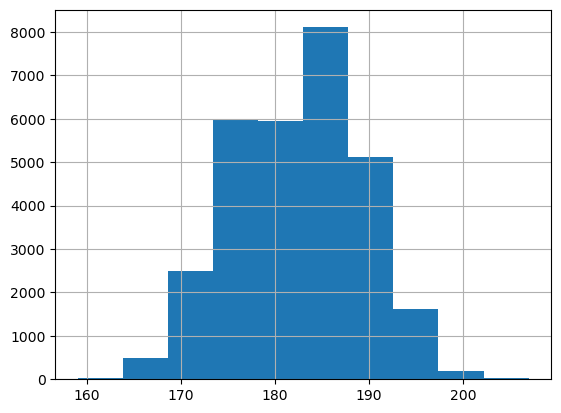

In [29]:
df["height_in_cm"].hist()

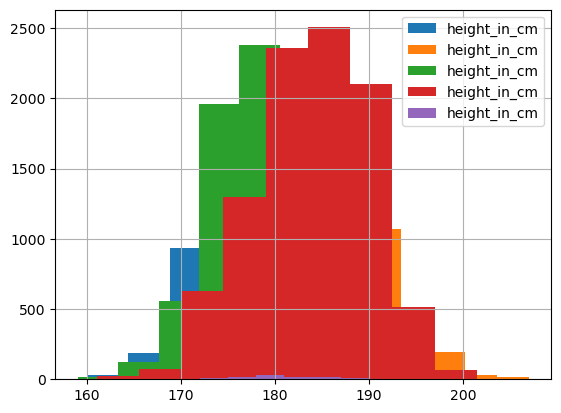

In [31]:
for pos in positions_ht:
    positions_ht[pos].hist(legend=True)

In [32]:
df['date_of_birth'].head()

0    1978-06-09 00:00:00
1    1980-08-06 00:00:00
4    1981-03-18 00:00:00
7    1980-10-04 00:00:00
8    1976-06-13 00:00:00
Name: date_of_birth, dtype: object

In [33]:
df['birth_month'] = pd.to_datetime(df['date_of_birth']).dt.month

In [ ]:
df['birth_month'].dropna().mean()

np.float64(5.744328591891802)

In [36]:
st.skew(df['birth_month'].dropna())

np.float64(0.25637254061103487)

In [39]:
for mth in df['birth_month'].sort_values().dropna().unique():
    count = df.loc[df['birth_month'] == mth, "birth_month"].count()
    print(f"{mth} = {count}")

1.0 = 3725
2.0 = 3005
3.0 = 3128
4.0 = 2781
5.0 = 2709
6.0 = 2413
7.0 = 2355
8.0 = 2240
9.0 = 2150
10.0 = 1948
11.0 = 1842
12.0 = 1723
